In [1]:
# Basic import
import os
import sys
import json
import shutil
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Helper function
def writeProgress(msg, count, total):
    sys.stdout.write(msg + "{:.2%}\r".format(count/total))
    sys.stdout.flush()
    
def newPath(path):
    if not os.path.isdir(path):
        os.mkdir(path)

def read_json(src_path):
    with open(src_path, 'r') as json_file:
        data = json.load(json_file)
    return data

def write_json(data,dst_path):
    with open(dst_path, 'w') as outfile:
        json.dump(data, outfile)

In [3]:
columns = ['Biography',
         'Animation',
         'Sci-Fi',
         'Fantasy',
         'Romance',
         'Crime',
         'Mystery',
         'Horror',
         'Thriller',
         'Action',
         'Adventure',
         'Comedy',
         'Drama',
         'Others'] # 14 classes

# Text preprocessing

In [4]:
data = read_json('./input/genresMat.json')
len(data)

97

In [5]:
train_data=pd.read_csv('./stopword/train_IG.csv')
train_data

,username,text,genres
0,47metersdown,catch 47 meters : uncaged spot last night # nb...,"['Adventure', 'Drama', 'Horror']"
1,47metersdown,know swims beneath deep ? 47 meters : uncaged ...,"['Adventure', 'Drama', 'Horror']"
2,47metersdown,stay . alive . 🦈 47 meters : uncaged theaters ...,"['Adventure', 'Drama', 'Horror']"
3,47metersdown,take bite summer takes bite . 47 meters : unca...,"['Adventure', 'Drama', 'Horror']"
4,47metersdown,celebrate responsibly holiday weekend… 🇺🇸👙🦈💥 #...,"['Adventure', 'Drama', 'Horror']"
5,47metersdown,upside irl . 🦈 # sharkbait,"['Adventure', 'Drama', 'Horror']"
6,47metersdown,taking bite summer one month ! 47 meters : unc...,"['Adventure', 'Drama', 'Horror']"
7,47metersdown,summer vacation leveled . 47 meters : uncaged ...,"['Adventure', 'Drama', 'Horror']"
8,47metersdown,day 47 . 😉 🦈 47 meters : uncaged hits theaters...,"['Adventure', 'Drama', 'Horror']"
9,47metersdown,could possibly go wrong ? 47 meters uncaged hi...,"['Adventure', 'Drama', 'Horror']"


In [6]:
ids = train_data['username'].tolist()

In [7]:
texts = train_data['text'].tolist()
len(texts)

15412

In [8]:
test_data=pd.read_csv('./stopword/test.csv')
test_data

,username,text
0,47metersdown,four teen girls diving ruined underwater city ...
1,adogsjourneymovie,dog finds meaning existence lives humans meets .
2,aftermathmovie,"post world war ii , british colonel wife assig..."
3,aftermovie,young woman falls guy dark secret two embark r...
4,alitamovie,"deactivated cyborg revived , remember anything..."
5,angelhasfallen,secret service agent mike banning framed attem...
6,angrybirdsmovie,flightless birds scheming green pigs take feud...
7,annabellemovie,"babysitting daughter ed lorraine warren , teen..."
8,annamovie,beneath anna poliatova 's striking beauty lies...
9,apollo11movie,look apollo 11 mission land moon led commander...


In [9]:
labels = [data[id] for id in ids]
labels

[[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0],
 [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0],
 [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0],
 [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0],
 [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0],
 [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0],
 [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0],
 [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0],
 [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0],
 [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0],
 [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0],
 [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0],
 [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0],
 [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0],
 [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0],
 [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0],
 [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0],
 [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0],
 [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0],
 [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0],
 [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0],
 [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0],
 [0, 0, 0,

In [10]:
len(labels)

15412

In [11]:
total = len(labels)
trainNum = int(total * 0.8)
validNum = total - trainNum
print(total, trainNum, validNum)

15412 12329 3083


In [12]:
maxlen = 50  # 100 個文字後切斷評論 (只看評論的前 100 個字)
training_samples = trainNum  # 以 200 個樣本進行訓練
validation_samples = validNum # 以 10, 000 個樣本進行驗證
max_words = 10000  # 僅考慮資料集中的前 10, 000 個單詞

In [13]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=max_words, filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n\'')
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts) # 將文字轉成整數 list 的序列資料
print(type(sequences))

word_index = tokenizer.word_index
print('共使用了 %s 個 token 字詞.' % len(word_index))

data = pad_sequences(sequences, maxlen=maxlen) # 只取每個評論的前 100 個字 (多切少補) 作為資料張量
labels = np.asarray(labels)  # 將標籤 list 轉為 Numpy array (標籤張量)

print('資料張量 shape:', data.shape) # (25000, 100)
print('標籤張量 shape:', labels.shape) # (25000,)

indices = np.arange(data.shape[0])  # 將資料拆分為訓練集和驗證集, 但首先要將資料打散, 因為所處理的資料是有順序性的樣本資料 (負評在前, 然後才是正評)
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]

Using TensorFlow backend.


<class 'list'>
共使用了 20170 個 token 字詞.
資料張量 shape: (15412, 50)
標籤張量 shape: (15412, 14)


In [14]:
print('train:', x_train.shape, y_train.shape)
print('val:', x_val.shape, y_val.shape)

train: (12329, 50) (12329, 14)
val: (3083, 50) (3083, 14)


# Glove

## 解析 GloVe 文字嵌入向量檔案

In [15]:
glove_dir = './model/glove.6B'

embeddings_index = {}
f = open(os.path.join(glove_dir, 'glove.6B.300d.txt'), encoding='UTF-8')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('共有 %s 個文字嵌入向量' % len(embeddings_index))

共有 400000 個文字嵌入向量


## 準備 GloVe 文字嵌入向量矩陣

In [16]:
embedding_dim = 300

embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    if i < max_words:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector  # ←嵌入向量索引中找不到的文字將為 0

# Model setup

In [17]:
from keras.models import Sequential
from keras import layers

model = Sequential()
# 參數 樣本數, 嵌入向量維度, 
model.add(layers.Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.MaxPooling1D(5))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(14, activation='sigmoid'))

model.summary()

W1017 14:49:24.864728  8292 deprecation_wrapper.py:119] From c:\users\tonylab\appdata\local\programs\python\python36\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1017 14:49:25.297707  8292 deprecation_wrapper.py:119] From c:\users\tonylab\appdata\local\programs\python\python36\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1017 14:49:25.415361  8292 deprecation_wrapper.py:119] From c:\users\tonylab\appdata\local\programs\python\python36\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W1017 14:49:25.598905  8292 deprecation_wrapper.py:119] From c:\users\tonylab\appdata\local\programs\python\python36\lib\site-packages\keras\backend\tensorflow_backend.py:3976: The name tf.nn.max_pool is depre

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 50, 300)           3000000   
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 44, 32)            67232     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 8, 32)             0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 2, 32)             7200      
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 14)                462       
Total params: 3,074,894
Trainable params: 3,074,894
Non-trainable params: 0
_________________________________________________________________


## 將預訓練的文字嵌入向量載入到嵌入向量層中

In [18]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False 

W1017 14:49:25.739495  8292 deprecation_wrapper.py:119] From c:\users\tonylab\appdata\local\programs\python\python36\lib\site-packages\keras\backend\tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W1017 14:49:25.740511  8292 deprecation_wrapper.py:119] From c:\users\tonylab\appdata\local\programs\python\python36\lib\site-packages\keras\backend\tensorflow_backend.py:181: The name tf.ConfigProto is deprecated. Please use tf.compat.v1.ConfigProto instead.



In [36]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=20,
                    batch_size=32,
                    validation_data=(x_val, y_val))
model.save_weights('pre_trained_glove_model.h5')

Train on 12329 samples, validate on 3083 samples
Epoch 1/6
12329/12329 [==============================] - 5s 431us/step - loss: 0.0998 - acc: 0.9600 - val_loss: 0.6111 - val_acc: 0.8581
Epoch 2/6
12329/12329 [==============================] - 5s 427us/step - loss: 0.0946 - acc: 0.9623 - val_loss: 0.6010 - val_acc: 0.8590
Epoch 3/6
12329/12329 [==============================] - 5s 438us/step - loss: 0.0919 - acc: 0.9631 - val_loss: 0.6342 - val_acc: 0.8548
Epoch 4/6
12329/12329 [==============================] - 5s 433us/step - loss: 0.0886 - acc: 0.9644 - val_loss: 0.6659 - val_acc: 0.8587
Epoch 5/6
12329/12329 [==============================] - 5s 391us/step - loss: 0.0859 - acc: 0.9656 - val_loss: 0.6756 - val_acc: 0.8546
Epoch 6/6
12329/12329 [==============================] - 5s 398us/step - loss: 0.0831 - acc: 0.9670 - val_loss: 0.6772 - val_acc: 0.8554


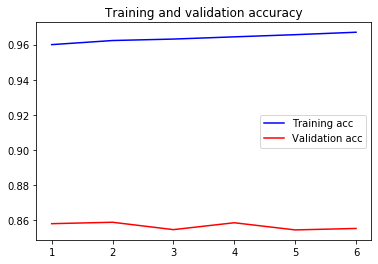

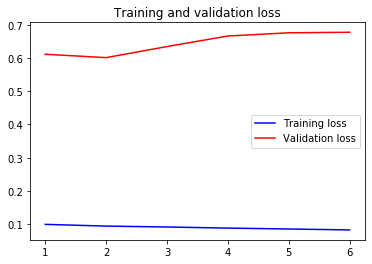

In [37]:
# 繪製結果
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


# Testing

In [38]:
sequences_test=tokenizer.texts_to_sequences(test_data.text)
X_test = pad_sequences(sequences_test,maxlen=maxlen)
pred = model.predict(X_test, verbose = 1)

97/97 [==============================] - 0s 566us/step


In [39]:
X_test.shape

(97, 50)

In [40]:
pred.shape

(97, 14)

In [41]:
predictions = pred #pred_bool.astype(int)

results=pd.DataFrame(predictions, columns=columns)
results["username"] = test_data.username
ordered_cols = ["username"] + columns
results = results[ordered_cols] #To get the same column order
results.to_csv("./output/result_word2vec.csv",index=False)

## Label top n dynamic

In [42]:
true_df = pd.read_csv('./true_df.csv')
true_df

,username,Biography,Animation,Sci-Fi,Fantasy,Romance,Crime,Mystery,Horror,Thriller,Action,Adventure,Comedy,Drama,Others
0,47metersdown,0,0,0,0,0,0,0,1,0,0,1,0,1,0
1,adogsjourneymovie,0,0,0,0,0,0,0,0,0,0,1,1,1,0
2,aftermathmovie,0,0,0,0,1,0,0,0,0,0,0,0,1,1
3,aftermovie,0,0,0,0,1,0,0,0,0,0,0,0,1,0
4,alitamovie,0,0,1,0,0,0,0,0,0,1,1,0,0,0
5,angelhasfallen,0,0,0,0,0,0,0,0,1,1,0,0,0,0
6,angrybirdsmovie,0,1,0,0,0,0,0,0,0,0,1,1,0,0
7,annabellemovie,0,0,0,0,0,0,1,1,1,0,0,0,0,0
8,annamovie,0,0,0,0,0,0,0,0,1,1,0,0,0,0
9,apollo11movie,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [43]:
results = pd.read_csv('./output/result_word2vec.csv')
results

,username,Biography,Animation,Sci-Fi,Fantasy,Romance,Crime,Mystery,Horror,Thriller,Action,Adventure,Comedy,Drama,Others
0,47metersdown,0.000000e+00,1.324767e-02,9.375643e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.994324e-01,1.000000e+00,0.000000e+00,2.980232e-08,5.960464e-08
1,adogsjourneymovie,4.112720e-06,9.816571e-01,5.662441e-07,1.068026e-03,8.368611e-03,7.085502e-04,3.725290e-06,1.490116e-07,0.000000e+00,3.301203e-04,9.823437e-01,9.999935e-01,8.254081e-03,9.179115e-06
2,aftermathmovie,1.788139e-05,0.000000e+00,3.028033e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.490116e-06,2.199113e-04,8.180440e-04,0.000000e+00,8.098555e-01,2.339290e-01
3,aftermovie,0.000000e+00,1.487136e-05,0.000000e+00,1.311302e-06,1.128531e-01,9.611888e-01,0.000000e+00,0.000000e+00,0.000000e+00,1.370907e-06,1.080930e-04,1.000000e+00,1.198891e-02,0.000000e+00
4,alitamovie,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.470348e-07,1.000000e+00,9.987178e-01,0.000000e+00,0.000000e+00,0.000000e+00
5,angelhasfallen,0.000000e+00,0.000000e+00,0.000000e+00,1.296222e-03,1.229644e-04,1.788139e-07,0.000000e+00,7.826090e-05,5.697906e-04,2.987087e-04,0.000000e+00,3.586052e-01,0.000000e+00,0.000000e+00
6,angrybirdsmovie,0.000000e+00,4.101937e-01,5.960464e-08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,2.980232e-08,0.000000e+00,0.000000e+00
7,annabellemovie,0.000000e+00,1.743138e-04,2.980232e-07,0.000000e+00,0.000000e+00,0.000000e+00,3.695488e-06,2.556181e-02,0.000000e+00,0.000000e+00,3.529078e-01,0.000000e+00,0.000000e+00,0.000000e+00
8,annamovie,0.000000e+00,1.788139e-07,7.281958e-01,0.000000e+00,0.000000e+00,5.960464e-08,0.000000e+00,0.000000e+00,4.075468e-04,1.000000e+00,9.999998e-01,2.980232e-08,0.000000e+00,0.000000e+00
9,apollo11movie,2.980232e-08,0.000000e+00,6.733668e-02,1.750588e-04,0.000000e+00,0.000000e+00,0.000000e+00,1.788139e-07,3.920838e-02,9.977573e-01,8.946385e-01,0.000000e+00,3.489852e-05,9.991028e-01


In [44]:
labels = read_json('genresDicOthers.json')

In [45]:
def countAcc(predList, trueList):
    fraction = 0
    denominator = len(trueList)
    for g in predList:
        if g in trueList:
            fraction += 1 
    return fraction / denominator

In [46]:
li = []
for i, row in true_df.iterrows():
    username = row['username']
    if username == results.loc[i,:]['username']: # username equals
        print(i, username)
        truth = labels[username]
        numTrue = sum(row[1:])
        print('count:', numTrue)
        
        s = results.loc[i,:][1:]
        top_n = s.sort_values(ascending=False)[:numTrue]
        inList = list(top_n.index)
        
        onehot = []
        for g in columns:
            onehot.append(int(g in inList))
            
        acc = countAcc(inList, truth)
        print(acc, inList, truth)
        
        appList = [username, acc, truth, inList] + onehot
        li.append(appList)
        

0 47metersdown
count: 3
0.3333333333333333 ['Adventure', 'Action', 'Sci-Fi'] ['Adventure', 'Drama', 'Horror']
1 adogsjourneymovie
count: 3
0.6666666666666666 ['Comedy', 'Adventure', 'Animation'] ['Adventure', 'Comedy', 'Drama']
2 aftermathmovie
count: 3
0.6666666666666666 ['Drama', 'Sci-Fi', 'Others'] ['Drama', 'Romance', 'Others']
3 aftermovie
count: 2
0.0 ['Comedy', 'Crime'] ['Drama', 'Romance']
4 alitamovie
count: 3
1.0 ['Action', 'Sci-Fi', 'Adventure'] ['Action', 'Adventure', 'Sci-Fi']
5 angelhasfallen
count: 2
0.0 ['Comedy', 'Fantasy'] ['Action', 'Thriller']
6 angrybirdsmovie
count: 3
0.6666666666666666 ['Adventure', 'Action', 'Animation'] ['Adventure', 'Animation', 'Comedy']
7 annabellemovie
count: 3
0.3333333333333333 ['Adventure', 'Horror', 'Animation'] ['Horror', 'Mystery', 'Thriller']
8 annamovie
count: 2
0.5 ['Action', 'Adventure'] ['Action', 'Thriller']
9 apollo11movie
count: 1
1.0 ['Others'] ['Others']
10 arcticmovie
count: 2
0.5 ['Adventure', 'Comedy'] ['Adventure', 'Dram

In [47]:
acc_df = pd.DataFrame(li, columns = ['username', 'acc', 'truth', 'top_n'] + columns)
acc_df

,username,acc,truth,top_n,Biography,Animation,Sci-Fi,Fantasy,Romance,Crime,Mystery,Horror,Thriller,Action,Adventure,Comedy,Drama,Others
0,47metersdown,0.333333,"[Adventure, Drama, Horror]","[Adventure, Action, Sci-Fi]",0,0,1,0,0,0,0,0,0,1,1,0,0,0
1,adogsjourneymovie,0.666667,"[Adventure, Comedy, Drama]","[Comedy, Adventure, Animation]",0,1,0,0,0,0,0,0,0,0,1,1,0,0
2,aftermathmovie,0.666667,"[Drama, Romance, Others]","[Drama, Sci-Fi, Others]",0,0,1,0,0,0,0,0,0,0,0,0,1,1
3,aftermovie,0.000000,"[Drama, Romance]","[Comedy, Crime]",0,0,0,0,0,1,0,0,0,0,0,1,0,0
4,alitamovie,1.000000,"[Action, Adventure, Sci-Fi]","[Action, Sci-Fi, Adventure]",0,0,1,0,0,0,0,0,0,1,1,0,0,0
5,angelhasfallen,0.000000,"[Action, Thriller]","[Comedy, Fantasy]",0,0,0,1,0,0,0,0,0,0,0,1,0,0
6,angrybirdsmovie,0.666667,"[Adventure, Animation, Comedy]","[Adventure, Action, Animation]",0,1,0,0,0,0,0,0,0,1,1,0,0,0
7,annabellemovie,0.333333,"[Horror, Mystery, Thriller]","[Adventure, Horror, Animation]",0,1,0,0,0,0,0,1,0,0,1,0,0,0
8,annamovie,0.500000,"[Action, Thriller]","[Action, Adventure]",0,0,0,0,0,0,0,0,0,1,1,0,0,0
9,apollo11movie,1.000000,[Others],[Others],0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [48]:
acc_df.to_csv('./output/result_word2vec_bi.csv', index = 0)